In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, recall_score, mean_absolute_error, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics 

# Cardio datasets

In [2]:
df = pd.read_csv('cardio_train.csv', sep = ";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Age is in days. We have some data that may be wrong in height, wieght, ap_hi and ap_lo. The normal values to ap_hi are between 110 and 160, while ap_lo are 65 and 120

In [6]:
def numerical_plot(df, target='cardio'):   
    cols = 3
    num_cols = df.select_dtypes(include='number').iloc[:, 1:-1].columns
    rows = len(num_cols)

    figure, axs = plt.subplots(rows,cols,figsize = (20,rows*5))

    for i, col in enumerate(num_cols):
        sns.histplot(df[col], fill = True, kde= True, ax=axs[i,0])
        sns.boxplot(df[col], ax=axs[i,1])
        sns.scatterplot(x=df[col], y=df[target], ax=axs[i,2])
        axs[i,0].set_title(f"Dist. of {col}; Skew:{round(df[col].skew(),2)}; Null:{round(100*(df[col].isnull().sum()/len(df)),2)}%")
        axs[i,1].set_title(f"Boxplot of {col}")
        axs[i,2].set_title(f"Scatterplot : {target} v. {col}")
    plt.tight_layout()
    plt.show()

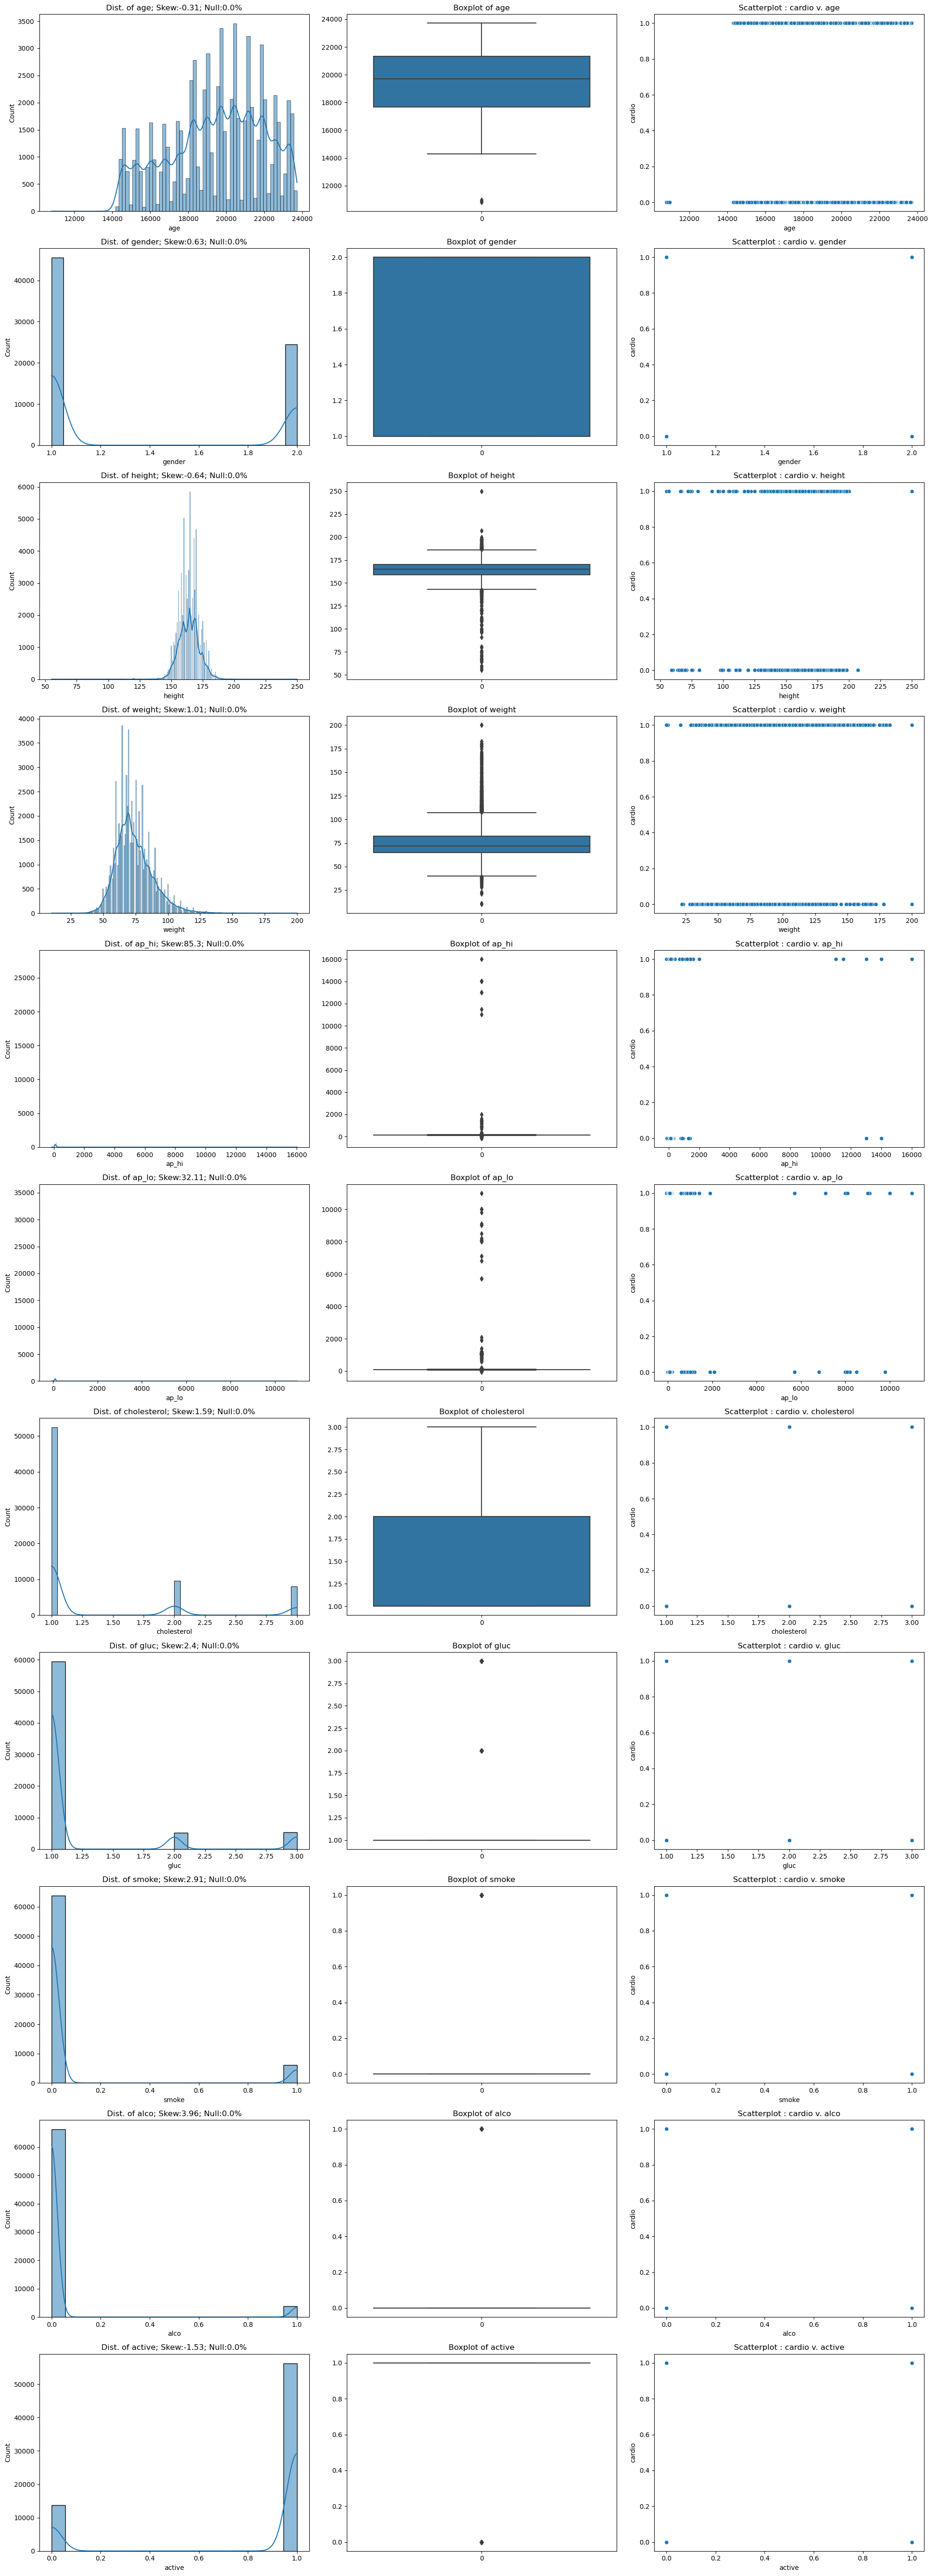

In [7]:
numerical_plot(df)

Weight, height, ap_hi and ap_lo have outliers

## Analysis of variables

In [8]:
df.ap_lo.value_counts()

80     34847
90     14316
70     10245
100     4082
60      2727
       ...  
56         1
182        1
810        1
9          1
602        1
Name: ap_lo, Length: 157, dtype: int64

<Axes: >

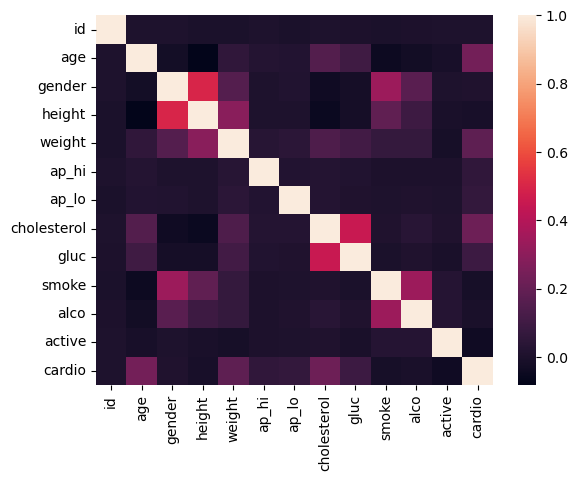

In [9]:
sns.heatmap(df.corr())

## EDA

- How much heavier the age group with the highest average weight than the age group with the lowest weight?

In [10]:
avg_weight_by_age = df.groupby('age').agg({'weight': 'mean'})
print(avg_weight_by_age.max())
print(avg_weight_by_age.min())

weight    165.0
dtype: float64
weight    11.0
dtype: float64


In [11]:
avg_weight_by_age.max() / avg_weight_by_age.min() - 1

weight    14.0
dtype: float64

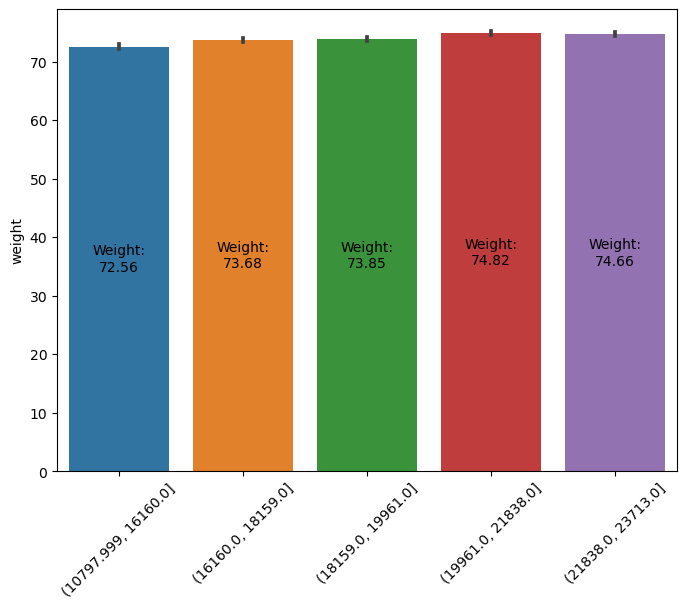

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(avg_weight_by_age, x = pd.qcut(avg_weight_by_age.index,5), y = 'weight', ax = ax)

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Weight:\n%.2f', label_type='center')
plt.xticks(rotation = 45)
plt.show()

THe highest average weight group is about 28% heavier

- Do people over 50 have higher cholesterol levels than the rest?

In [13]:
avg_cholesterol_by_age = df.groupby('age').agg({'cholesterol': 'mean'})
(avg_cholesterol_by_age[avg_cholesterol_by_age.index > 50].mean() / 
 avg_cholesterol_by_age[avg_cholesterol_by_age.index <= 50].mean() - 1)

cholesterol   NaN
dtype: float64

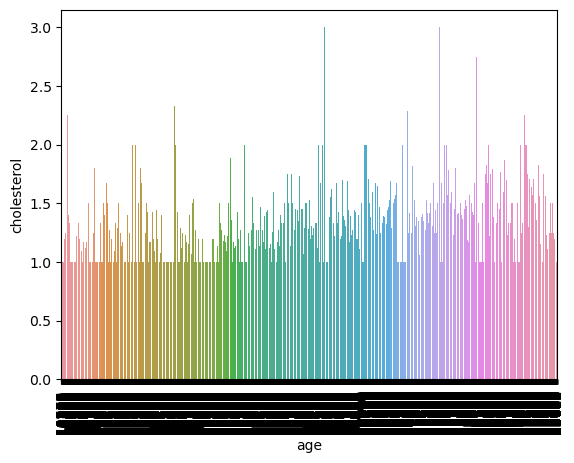

In [14]:
avg_cholesterol_by_age.reset_index(inplace = True)
avg_cholesterol_by_age.cholesterol = round(avg_cholesterol_by_age.cholesterol,2)
sns.barplot(avg_cholesterol_by_age, x = 'age', y = round(avg_cholesterol_by_age.cholesterol,2))
plt.xticks(rotation = 90)
plt.show()

Yes, 19,83%

- Are men more likely to be a smoker than women?

In [15]:
print(df.groupby('gender').height.mean())
print(df.groupby('gender').weight.mean())

gender
1    161.355612
2    169.947895
Name: height, dtype: float64
gender
1    72.565605
2    77.257307
Name: weight, dtype: float64


Men generally are taller and heavier. So, gender 2 is men and gender 1 is women

In [16]:
num_smoker_by_gender = df.groupby('gender').agg({'smoke': 'sum'})
(num_smoker_by_gender[num_smoker_by_gender.index == 2]['smoke'].item() / 
 num_smoker_by_gender[num_smoker_by_gender.index == 1]['smoke'].item())

6.587945879458794

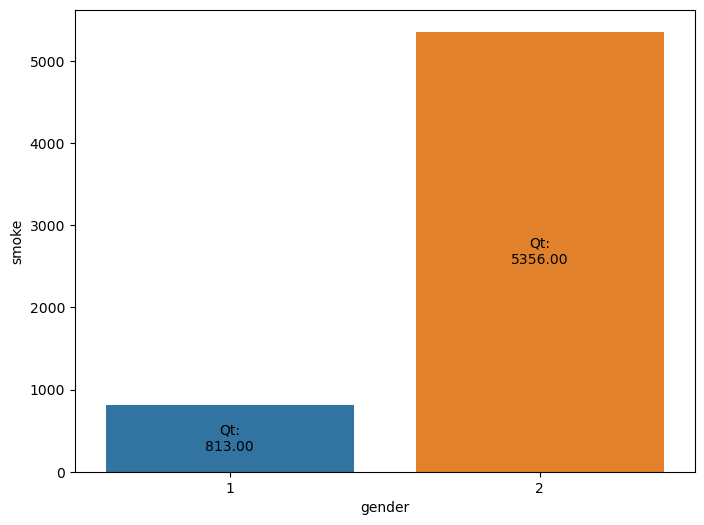

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(num_smoker_by_gender, x = num_smoker_by_gender.index, y = 'smoke')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Qt:\n%.2f', label_type='center')
plt.show()

Yes, men are more likely smokers

- How tall are the tallest 1% of people

In [18]:
df.height.count()

70000

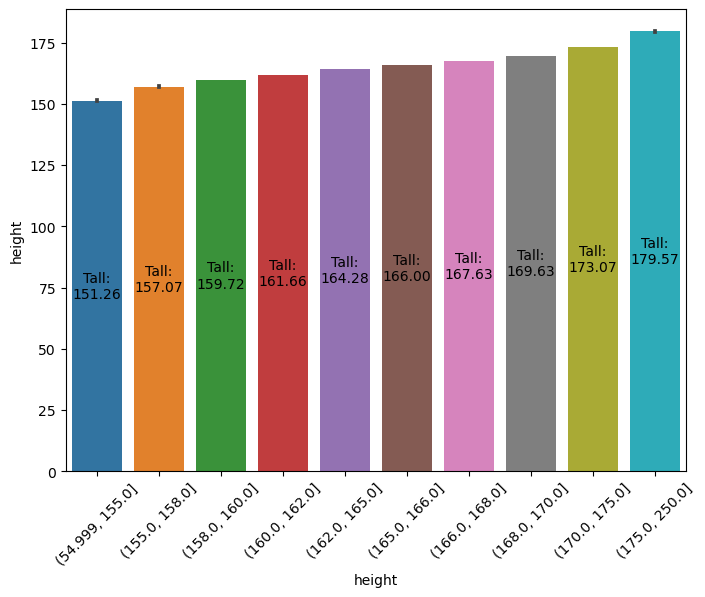

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(df, x = pd.qcut(df.height,10), y = 'height')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Tall:\n%.2f', label_type='center')
plt.xticks(rotation = 45)
plt.show()

In [20]:
df['height'].quantile(0.99)

184.0

- Which two features have the highest spearman rank correlation?

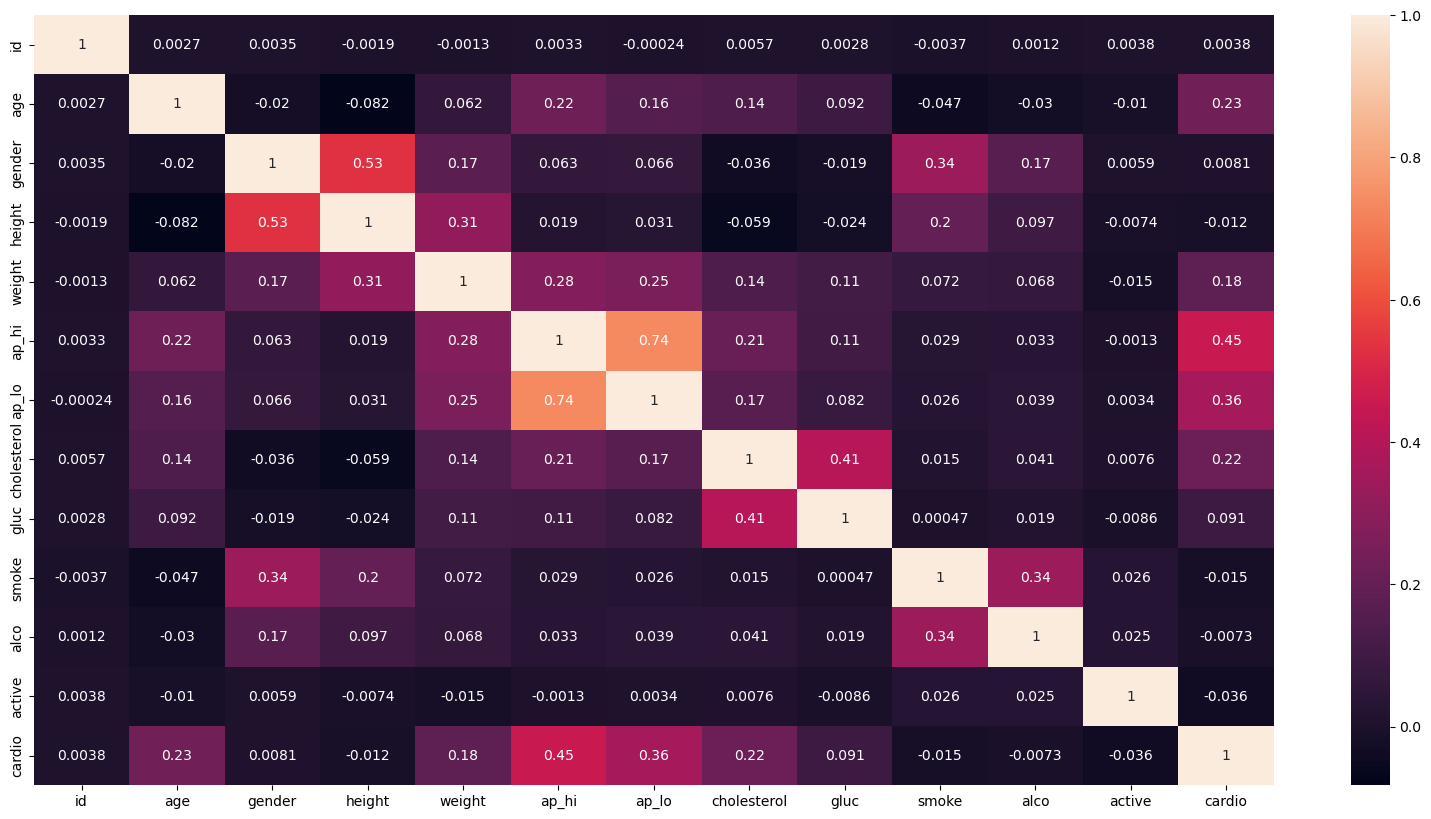

In [21]:
plt.figure(figsize=(20,10))
corr = df.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.show()

Ap_hi and ap_lo

- What percentage of people are more than 2 standard deviations far from the average height?

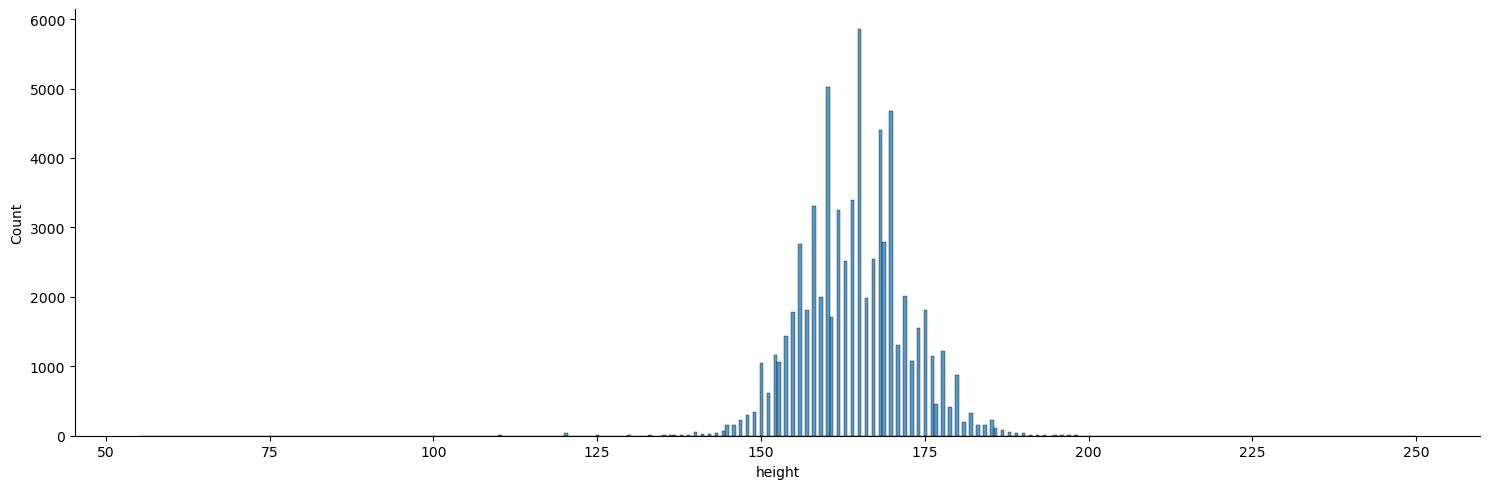

In [22]:
sns.displot(df.height,
    height=5,
    aspect=3,)

In [23]:
height_avg = df.height.mean()
height_std = df.height.std()
len(df[abs(df.height - height_avg) > 2 * height_std]) / len(df.height)*100

3.3357142857142854

About 3,33%

- What percentage of the population over 50 years old consume alcohol?
Ignore those persons, where we have no alcohol sonsumption information!

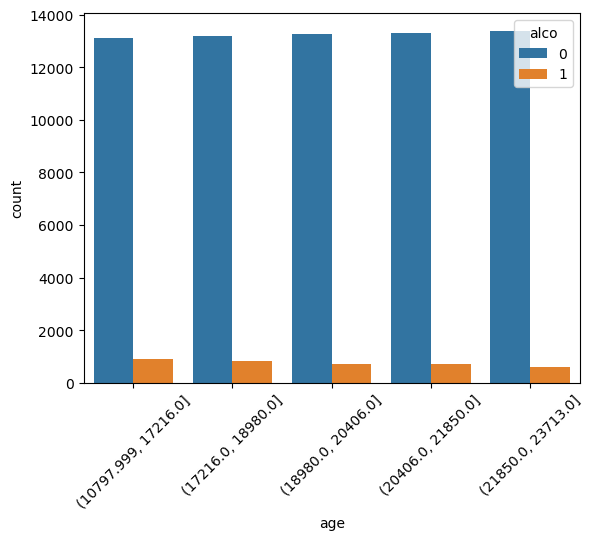

In [24]:
sns.countplot(df, x = pd.qcut(df.age,5), hue = 'alco')
plt.xticks(rotation = 45)
plt.show()

In [25]:
cardio_over_50_df = df[df['age'] > 50]
len(cardio_over_50_df[cardio_over_50_df['alco'] == 1]) / len(cardio_over_50_df)*100

5.377142857142857

About 5%

- Which of the following statements is true with 95% confidence?
    - Smokers have higher blood presure than non-smokers

In [26]:
df['ap_mean'] = (df['ap_hi'] + df['ap_lo']) / 2
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,95.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,115.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,100.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,125.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,80.0


In [27]:
stat_ap_mean_by_smoke_df = df.groupby('smoke')['ap_mean'].agg(['mean', 'sem'])
stat_ap_mean_by_smoke_df['ci95_hi'] = stat_ap_mean_by_smoke_df['mean'] + 1.96 * stat_ap_mean_by_smoke_df['sem']
stat_ap_mean_by_smoke_df['ci95_lo'] = stat_ap_mean_by_smoke_df['mean'] - 1.96 * stat_ap_mean_by_smoke_df['sem']
stat_ap_mean_by_smoke_df.reset_index(inplace = True)
stat_ap_mean_by_smoke_df

,smoke,mean,sem,ci95_hi,ci95_lo
0,0,112.593990,0.497122,113.568349,111.619631
1,1,114.067515,1.101288,116.226040,111.908990


<Axes: xlabel='smoke', ylabel='mean'>

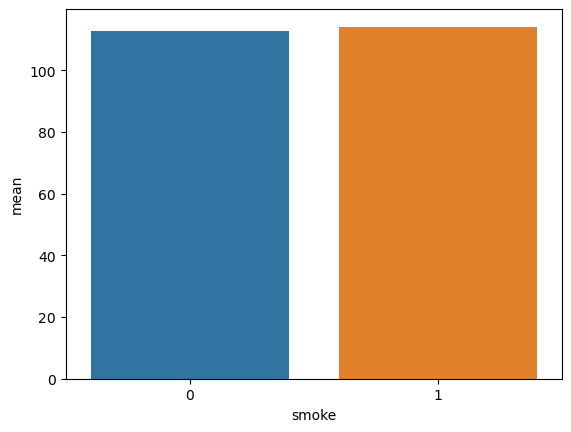

In [28]:
sns.barplot(stat_ap_mean_by_smoke_df, x = 'smoke', y = 'mean')

Not conclusive

    - Smokers have higher cholesterol level than non-smokers


In [29]:
stat_cholesterol_by_smoke_df = df.groupby('smoke')['cholesterol'].agg(['mean', 'sem'])
stat_cholesterol_by_smoke_df['ci95_hi'] = stat_cholesterol_by_smoke_df['mean'] + 1.96 * stat_cholesterol_by_smoke_df['sem']
stat_cholesterol_by_smoke_df['ci95_lo'] = stat_cholesterol_by_smoke_df['mean'] - 1.96 * stat_cholesterol_by_smoke_df['sem']
stat_cholesterol_by_smoke_df.reset_index(inplace = True)
stat_cholesterol_by_smoke_df

,smoke,mean,sem,ci95_hi,ci95_lo
0,0,1.364682,0.002692,1.369958,1.359405
1,1,1.389528,0.008671,1.406524,1.372533


<Axes: xlabel='smoke', ylabel='mean'>

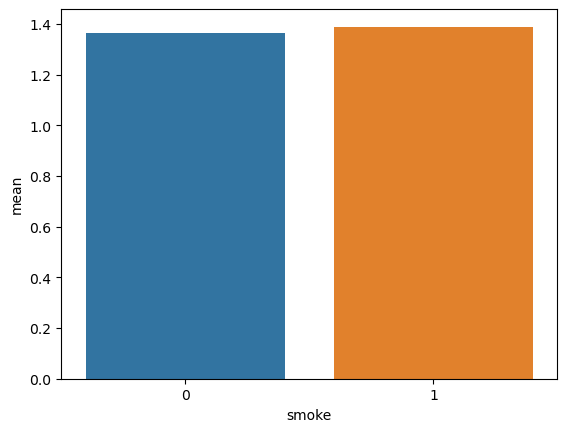

In [30]:
sns.barplot(stat_cholesterol_by_smoke_df, x = 'smoke', y = 'mean')

Not conclusive

    - Smokers weight less than non smokers

In [31]:
stat_weight_by_smoke_df = df.groupby('smoke')['weight'].agg(['mean', 'sem'])
stat_weight_by_smoke_df['ci95_hi'] = stat_weight_by_smoke_df['mean'] + 1.96 * stat_weight_by_smoke_df['sem']
stat_weight_by_smoke_df['ci95_lo'] = stat_weight_by_smoke_df['mean'] - 1.96 * stat_weight_by_smoke_df['sem']
stat_weight_by_smoke_df

,mean,sem,ci95_hi,ci95_lo
smoke,,,,
0,73.902352,0.056594,74.013275,73.791428
1,77.344351,0.191148,77.719001,76.969700


<Axes: xlabel='smoke', ylabel='mean'>

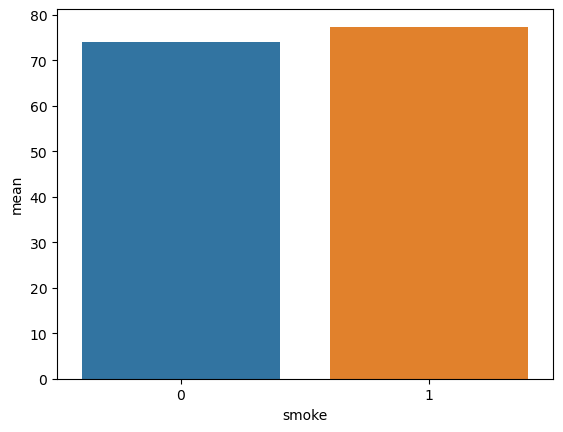

In [32]:
sns.barplot(stat_weight_by_smoke_df, x = stat_weight_by_smoke_df.index, y = 'mean')

May be possible, as smokers tend to do less exercise

    - Men have higher blood pressure than women

In [33]:
stat_ap_mean_by_gender_df = df.groupby('gender')['ap_mean'].agg(['mean', 'sem'])
stat_ap_mean_by_gender_df['ci95_hi'] = stat_ap_mean_by_gender_df['mean'] + 1.96 * stat_ap_mean_by_gender_df['sem']
stat_ap_mean_by_gender_df['ci95_lo'] = stat_ap_mean_by_gender_df['mean'] - 1.96 * stat_ap_mean_by_gender_df['sem']
stat_ap_mean_by_gender_df

,mean,sem,ci95_hi,ci95_lo
gender,,,,
1,111.331013,0.556746,112.422235,110.23979
2,115.315427,0.827759,116.937834,113.69302


<Axes: xlabel='gender', ylabel='mean'>

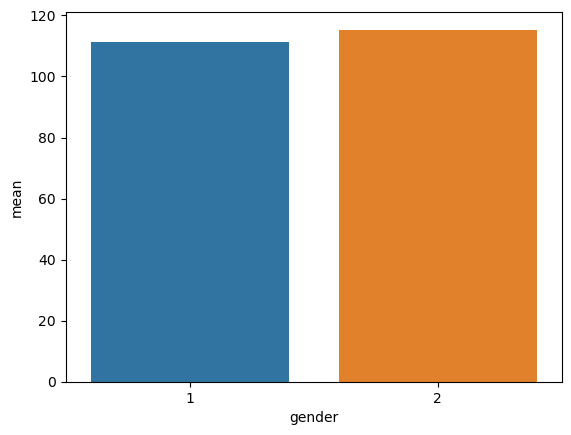

In [34]:
sns.barplot(stat_ap_mean_by_gender_df, x = stat_ap_mean_by_gender_df.index, y = 'mean')

May be possible also

## Analyzing the target variable cardio

- From wich age there are more cases of cardio

In [35]:
df.groupby(pd.qcut(df['age'],10)).agg({'cardio': 'count'})

,cardio
age,
"(10797.999, 15840.0]",7001
"(15840.0, 17216.0]",7000
"(17216.0, 18227.7]",6999
"(18227.7, 18980.0]",7010
"(18980.0, 19703.0]",6998
"(19703.0, 20406.0]",6995
"(20406.0, 21119.0]",7008
"(21119.0, 21850.0]",7000
"(21850.0, 22639.0]",6995


In [36]:
cardio_01 = df[df['cardio'] == 1].groupby(pd.qcut(df['age'],10)).agg({'cardio': 'count'})
cardio_01['cardio_zero'] = df[df['cardio'] == 0].groupby(pd.qcut(df['age'],10)).agg({'cardio': 'count'}).values
cardio_01['percent'] = round(cardio_01['cardio'] / (cardio_01['cardio'] +cardio_01['cardio_zero'] )*100,2)
cardio_01.sort_values('percent', ascending  = False)

,cardio,cardio_zero,percent
age,,,
"(22639.0, 23713.0]",4935,2059,70.56
"(21850.0, 22639.0]",4415,2580,63.12
"(21119.0, 21850.0]",4017,2983,57.39
"(20406.0, 21119.0]",3875,3133,55.29
"(19703.0, 20406.0]",3616,3379,51.69
"(18980.0, 19703.0]",3392,3606,48.47
"(17216.0, 18227.7]",3155,3844,45.08
"(18227.7, 18980.0]",3018,3992,43.05
"(15840.0, 17216.0]",2684,4316,38.34


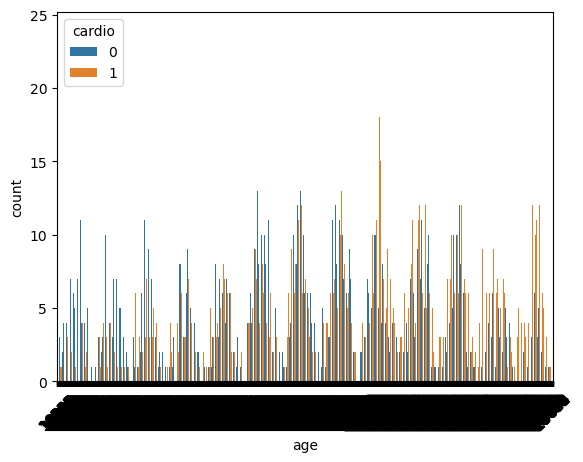

In [37]:
sns.countplot(df, x = 'age', hue = 'cardio')
plt.xticks(rotation = 45)
plt.show()

The cardio incidence grows with age in about 40%

- How about the gender and age

In [38]:
cardio_01_gender = df[df['cardio'] == 1].groupby([pd.qcut(df['age'],10), 'gender']).agg({'cardio': 'count'}).reset_index()
cardio_01_gender['cardio_zero'] = (df[df['cardio'] == 0].groupby([pd.qcut(df['age'],10), 'gender'])
                                   .agg({'cardio': 'count'})['cardio'].values)
cardio_01_gender_female = cardio_01_gender[cardio_01_gender['gender'] == 1]
cardio_01_gender_female['cardio_male'] = cardio_01_gender[cardio_01_gender['gender'] == 2]['cardio'].values
cardio_01_gender_female['cardio_zero_male'] = cardio_01_gender[cardio_01_gender['gender'] == 2]['cardio_zero'].values

cardio_01_gender_female.drop('gender', axis = 1, inplace = True)
cardio_01_gender_female

C:\Users\arsnf\AppData\Local\Temp\ipykernel_15764\3461560902.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_01_gender_female['cardio_male'] = cardio_01_gender[cardio_01_gender['gender'] == 2]['cardio'].values
C:\Users\arsnf\AppData\Local\Temp\ipykernel_15764\3461560902.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_01_gender_female['cardio_zero_male'] = cardio_01_gender[cardio_01_gender['gender'] == 2]['cardio_zero'].values
C:\Users\arsnf\AppData\Local\Temp\ipykernel_15764\3461560902

,age,cardio,cardio_zero,cardio_male,cardio_zero_male
0,"(10797.999, 15840.0]",1090,3257,782,1872
2,"(15840.0, 17216.0]",1609,2668,1075,1648
4,"(17216.0, 18227.7]",1888,2525,1267,1319
6,"(18227.7, 18980.0]",1952,2785,1066,1207
8,"(18980.0, 19703.0]",2240,2429,1152,1177
10,"(19703.0, 20406.0]",2413,2295,1203,1084
12,"(20406.0, 21119.0]",2638,2103,1237,1030
14,"(21119.0, 21850.0]",2667,1960,1350,1023
16,"(21850.0, 22639.0]",2942,1694,1473,886
18,"(22639.0, 23713.0]",3177,1198,1758,861


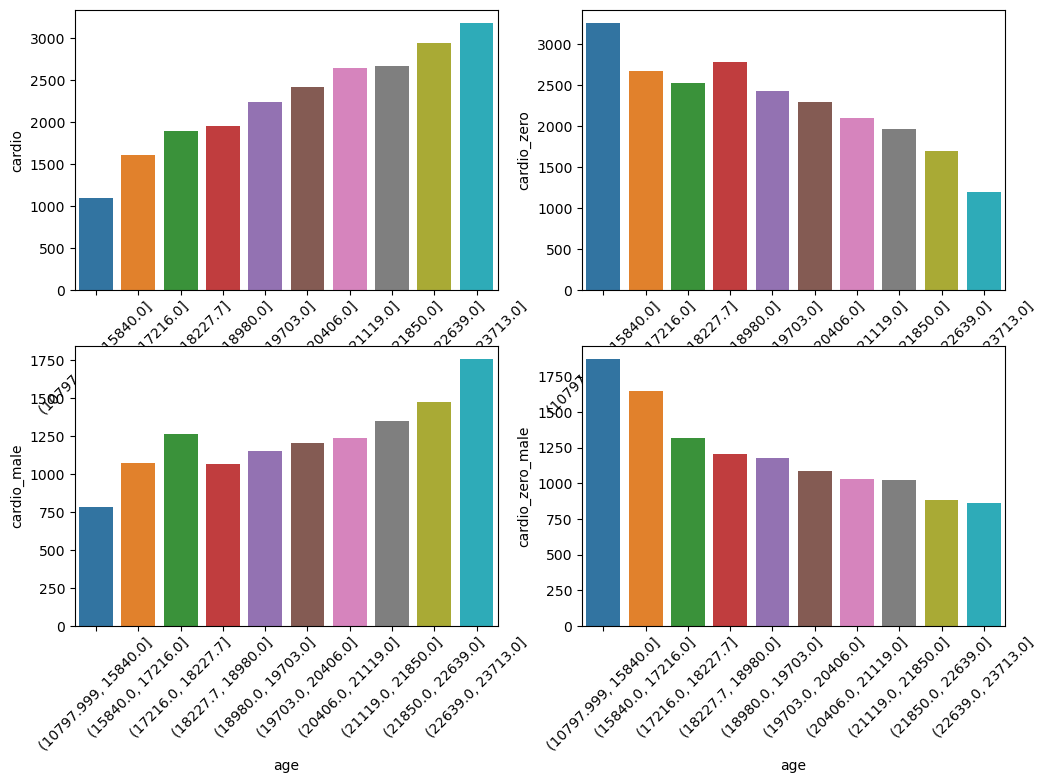

In [39]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))

sns.barplot(cardio_01_gender_female, x = 'age', y = 'cardio', ax = ax[0,0])
ax[0,0].tick_params(axis = 'x', rotation = 45)
sns.barplot(cardio_01_gender_female, x = 'age', y = 'cardio_zero', ax = ax[0,1])
ax[0,1].tick_params(axis = 'x', rotation = 45)
sns.barplot(cardio_01_gender_female, x = 'age', y = 'cardio_male', ax = ax[1,0])
ax[1,0].tick_params(axis = 'x', rotation = 45)
sns.barplot(cardio_01_gender_female, x = 'age', y = 'cardio_zero_male', ax = ax[1,1])
ax[1,1].tick_params(axis = 'x', rotation = 45)
plt.show()

In [40]:
1-df[df['gender']==1].cardio.sum()/df.cardio.sum()

0.35344063581005747

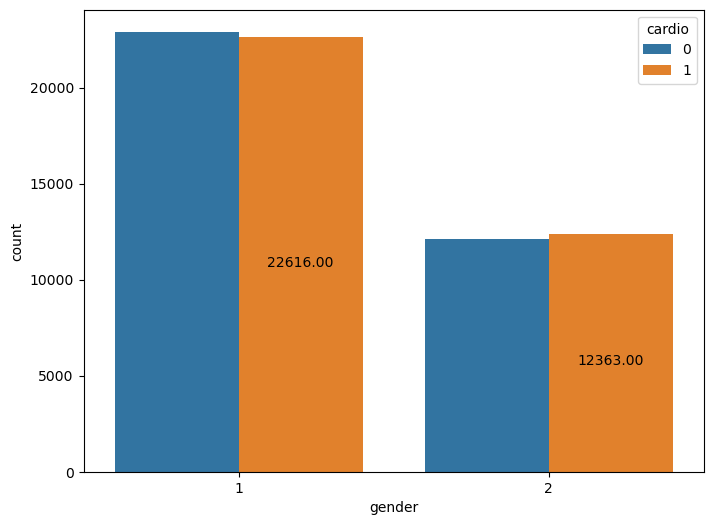

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.countplot(df, x = 'gender', hue = 'cardio')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='center')
#plt.xticks(rotation = 45)
plt.show()

As age, gender has the same behaviour. however there are about 35% more cases in men.

- Wich is the relation of height and weight with cardio?

For this, let's create the imc variable: weight / height**2. IMC is considered normal between 18,5 e 24,9 kg/m².

In [42]:
df['imc'] = df.weight / (df.height/100)**2
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,95.0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,115.0,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,100.0,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,125.0,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,80.0,23.011177


In [43]:
cardio_imc = df.groupby(pd.cut(df['imc'], [0, 18, 25, 35, 50, 300])).sum()
cardio_imc['cardio_count'] = df.groupby(pd.cut(df['imc'], [0, 18, 25, 35, 50, 300])).count()['cardio'].values
cardio_imc['percent_case'] = round((cardio_imc.cardio / (cardio_imc.cardio + cardio_imc.cardio_count)),2)*100
cardio_imc[['cardio', 'cardio_count', 'percent_case']]

,cardio,cardio_count,percent_case
imc,,,
"(0, 18]",116,425,21.0
"(18, 25]",10423,26029,29.0
"(25, 35]",20167,37284,35.0
"(35, 50]",4116,6018,41.0
"(50, 300]",157,244,39.0


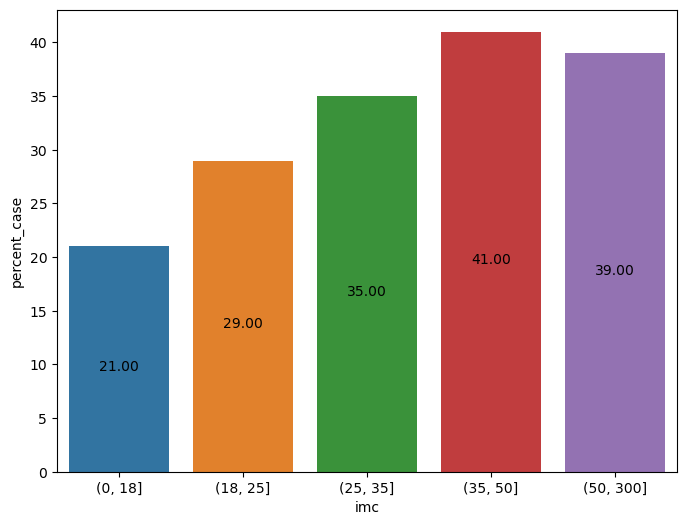

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(cardio_imc[['cardio', 'cardio_count', 'percent_case']], x = cardio_imc.index, y = 'percent_case')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='center')
#plt.xticks(rotation = 45)
plt.show()

It looks like the range between 35-50 is has the biggest number of incidences

- The IMC alters with gender regarding cardio

In [45]:
cardio_imc_gender = df[df['cardio'] == 1].groupby([pd.qcut(df['imc'],10), 'gender']).agg({'cardio': 'count'}).reset_index()
cardio_imc_gender['cardio_zero'] = (df[df['cardio'] == 0].groupby([pd.qcut(df['age'],10), 'gender'])
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_imc_gender['percent_cases'] = (round(cardio_imc_gender.cardio/
                                             (cardio_imc_gender.cardio + cardio_imc_gender.cardio_zero),2)*100)
cardio_imc_gender

,imc,gender,cardio,cardio_zero,percent_cases
0,"(3.471, 22.074]",1,1463,3257,31.0
1,"(3.471, 22.074]",2,872,1872,32.0
2,"(22.074, 23.437]",1,1936,2668,42.0
3,"(22.074, 23.437]",2,1091,1648,40.0
4,"(23.437, 24.242]",1,1671,2525,40.0
5,"(23.437, 24.242]",2,1121,1319,46.0
6,"(24.242, 25.283]",1,1886,2785,40.0
7,"(24.242, 25.283]",2,1278,1207,51.0
8,"(25.283, 26.374]",1,1901,2429,44.0
9,"(25.283, 26.374]",2,1351,1177,53.0


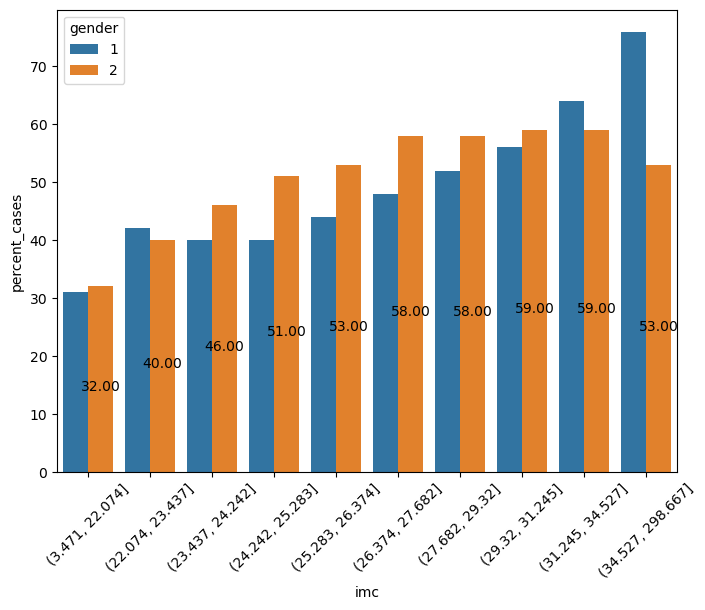

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(cardio_imc_gender, x = 'imc', y = 'percent_cases', hue = 'gender')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='center')
plt.xticks(rotation = 45)
plt.show()

Women with higher imc, has the higher incidence fo cardio. On the other ranges, men are more likely to cardio

- What about age and the IMC

In [47]:
cardio_imc_age = (df[df['cardio'] == 1].groupby([pd.qcut(df['imc'],5), pd.qcut(df['age'],5)])
                  .agg({'cardio': 'count'}).reset_index())
cardio_imc_age['cardio_zero'] = (df[df['cardio'] == 0].groupby([pd.qcut(df['imc'],5), pd.qcut(df['age'],5)])
                  .agg({'cardio': 'count'})['cardio'].values)
cardio_imc_age['percent_cases'] = round((cardio_imc_age.cardio/(cardio_imc_age.cardio + cardio_imc_age.cardio_zero)),2)*100
cardio_imc_age

,imc,age,cardio,cardio_zero,percent_cases
0,"(3.471, 23.437]","(10797.999, 17216.0]",793,3021,21.0
1,"(3.471, 23.437]","(17216.0, 18980.0]",947,2035,32.0
2,"(3.471, 23.437]","(18980.0, 20406.0]",1046,1721,38.0
3,"(3.471, 23.437]","(20406.0, 21850.0]",1188,1396,46.0
4,"(3.471, 23.437]","(21850.0, 23713.0]",1388,1039,57.0
5,"(23.437, 25.283]","(10797.999, 17216.0]",811,2140,27.0
6,"(23.437, 25.283]","(17216.0, 18980.0]",1065,1734,38.0
7,"(23.437, 25.283]","(18980.0, 20406.0]",1185,1531,44.0
8,"(23.437, 25.283]","(20406.0, 21850.0]",1309,1261,51.0
9,"(23.437, 25.283]","(21850.0, 23713.0]",1586,940,63.0


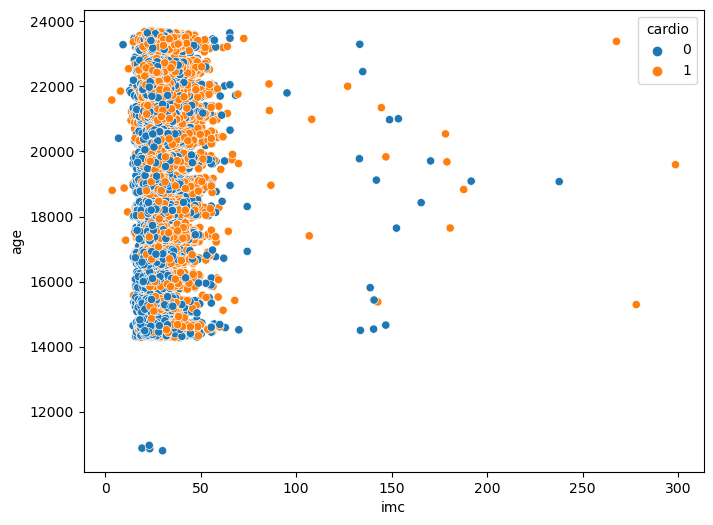

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.scatterplot(data=df, x="imc", y="age", hue="cardio")

plt.show()

It looks like, age is a more significant variable than the imc

- The relations of blood pressure and cardio

In [49]:
cardio_ap_hi = (df[df['cardio'] == 1].groupby([pd.qcut(df['ap_hi'],2), pd.qcut(df['ap_lo'],2)])
                  .agg({'cardio': 'count'}).reset_index())
cardio_ap_hi['cardio_zero'] = (df[df['cardio'] == 0].groupby([pd.qcut(df['ap_hi'],2), pd.qcut(df['ap_lo'],2)])
                  .agg({'cardio': 'count'})['cardio'].values)
cardio_ap_hi['percent_cases'] = round((cardio_ap_hi.cardio/(cardio_ap_hi.cardio + cardio_ap_hi.cardio_zero)),2)*100
cardio_ap_hi

,ap_hi,ap_lo,cardio,cardio_zero,percent_cases
0,"(-150.001, 120.0]","(-70.001, 80.0]",12248,26809,31.0
1,"(-150.001, 120.0]","(80.0, 11000.0]",702,978,42.0
2,"(120.0, 16020.0]","(-70.001, 80.0]",6570,3336,66.0
3,"(120.0, 16020.0]","(80.0, 11000.0]",15459,3898,80.0


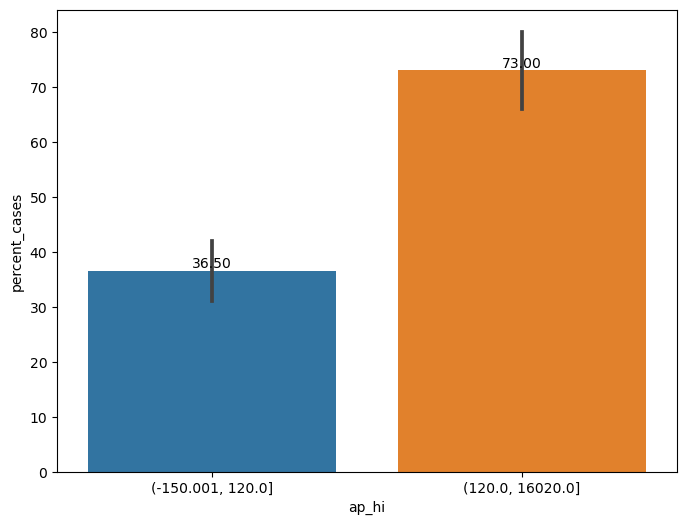

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(cardio_ap_hi, x = 'ap_hi', y = 'percent_cases')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='edge')

plt.show()

As higher the blood pressure, higher the cardio

- What is the relation between cholesterol and cardio

In [51]:
cardio_chol = df[df['cardio'] == 1].groupby('cholesterol').agg({'cardio': 'count'})
cardio_chol['cardio_zero'] = (df[df['cardio'] == 0].groupby('cholesterol')
                  .agg({'cardio': 'count'})['cardio'].values)
cardio_chol['percent_cases'] = round((cardio_chol.cardio/(cardio_chol.cardio + cardio_chol.cardio_zero)),2)*100
cardio_chol

,cardio,cardio_zero,percent_cases
cholesterol,,,
1,23055,29330,44.0
2,5750,3799,60.0
3,6174,1892,77.0


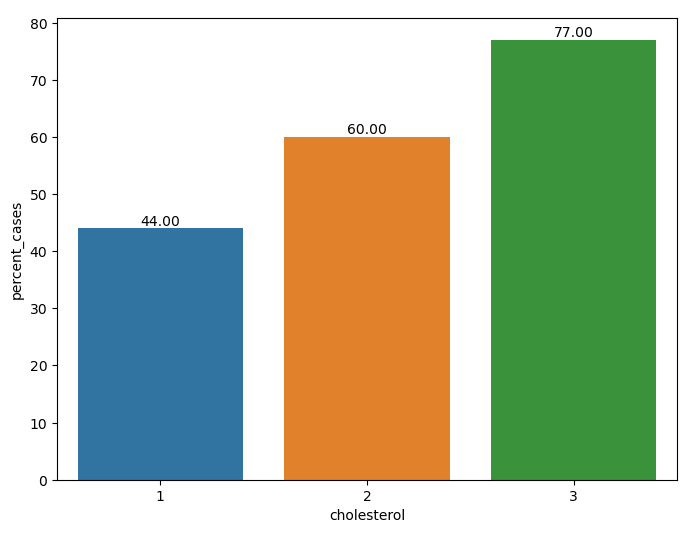

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(cardio_chol, x = cardio_chol.index, y = 'percent_cases')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='edge')

plt.show()

The higher the cholesterol indices, higher the percentual cases of cardio

- Crossing age, gender and imc with cholesterol regarding cardio

In [53]:
cardio_chol_age_imc = (df[df['cardio'] == 1].groupby([pd.qcut(df['imc'],5), pd.qcut(df['age'],5), 'cholesterol', 'gender'])
                   .agg({'cardio': 'count'}).reset_index())
cardio_chol_age_imc['cardio_zero'] = (df[df['cardio'] == 0].groupby([pd.qcut(df['imc'],5), pd.qcut(df['age'],5), 'cholesterol',
                                          'gender']).agg({'cardio': 'count'})['cardio'].values)
cardio_chol_age_imc['percent_cases'] = round((cardio_chol_age_imc.cardio/
                                              (cardio_chol_age_imc.cardio + cardio_chol_age_imc.cardio_zero)),2)*100
cardio_chol_age_imc.sort_values('percent_cases', ascending = False)

,imc,age,cholesterol,gender,cardio,cardio_zero,percent_cases
131,"(31.245, 298.667]","(17216.0, 18980.0]",3,2,79,12,87.0
148,"(31.245, 298.667]","(21850.0, 23713.0]",3,1,603,109,85.0
95,"(27.682, 31.245]","(10797.999, 17216.0]",3,2,47,8,85.0
118,"(27.682, 31.245]","(21850.0, 23713.0]",3,1,375,64,85.0
136,"(31.245, 298.667]","(18980.0, 20406.0]",3,1,350,69,84.0
...,...,...,...,...,...,...,...
60,"(25.283, 27.682]","(10797.999, 17216.0]",1,1,326,938,26.0
31,"(23.437, 25.283]","(10797.999, 17216.0]",1,2,304,859,26.0
30,"(23.437, 25.283]","(10797.999, 17216.0]",1,1,343,1088,24.0
1,"(3.471, 23.437]","(10797.999, 17216.0]",1,2,234,971,19.0


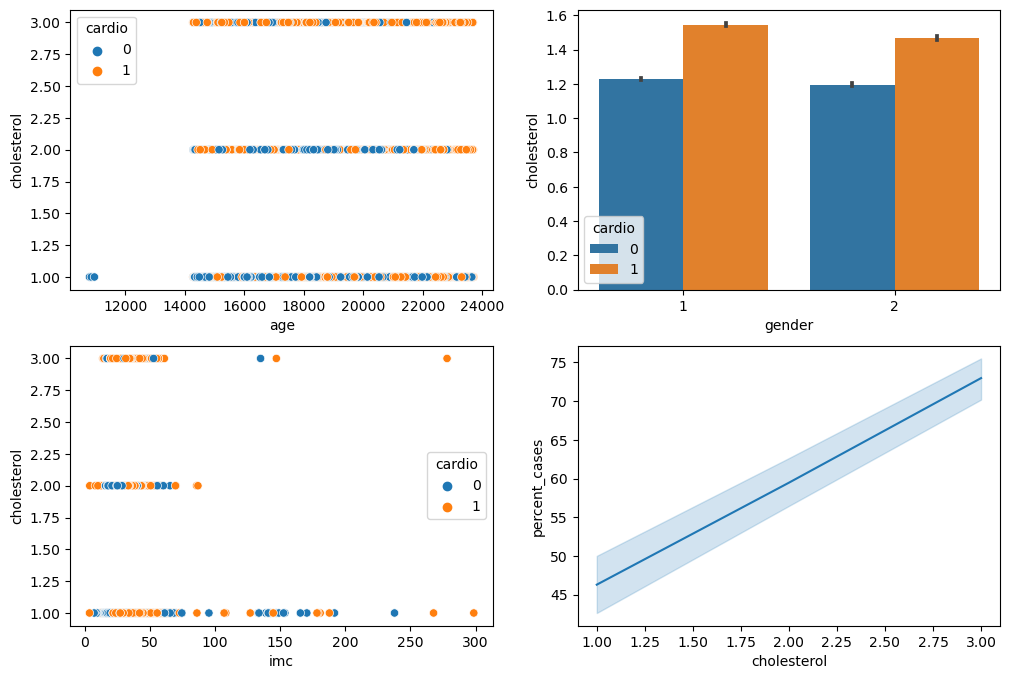

In [54]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))

sns.scatterplot(data=df, x="age", y="cholesterol", hue="cardio", ax = ax[0,0])
ax[0,0].tick_params(axis = 'x', rotation = 0)
sns.barplot(data=df, x="gender", y="cholesterol", hue="cardio", ax = ax[0,1])
ax[0,1].tick_params(axis = 'x', rotation = 0)
sns.scatterplot(data=df, x="imc", y="cholesterol", hue="cardio", ax = ax[1,0])
ax[1,0].tick_params(axis = 'x', rotation = 0)
sns.lineplot(data=cardio_chol_age_imc, x="cholesterol", y="percent_cases", ax = ax[1,1])
ax[1,1].tick_params(axis = 'x', rotation = 0)
plt.show()

Cholesterol affects more the highest IMC, the men and the older people

- Let's see about glucose

In [55]:
cardio_gluc = df[df['cardio'] == 1].groupby('gluc').agg({'cardio': 'count'})
cardio_gluc['cardio_zero'] = (df[df['cardio'] == 0].groupby('gluc')
                  .agg({'cardio': 'count'})['cardio'].values)
cardio_gluc['percent_cases'] = round((cardio_gluc.cardio/(cardio_gluc.cardio + cardio_gluc.cardio_zero)),2)*100
cardio_gluc

,cardio,cardio_zero,percent_cases
gluc,,,
1,28585,30894,48.0
2,3078,2112,59.0
3,3316,2015,62.0


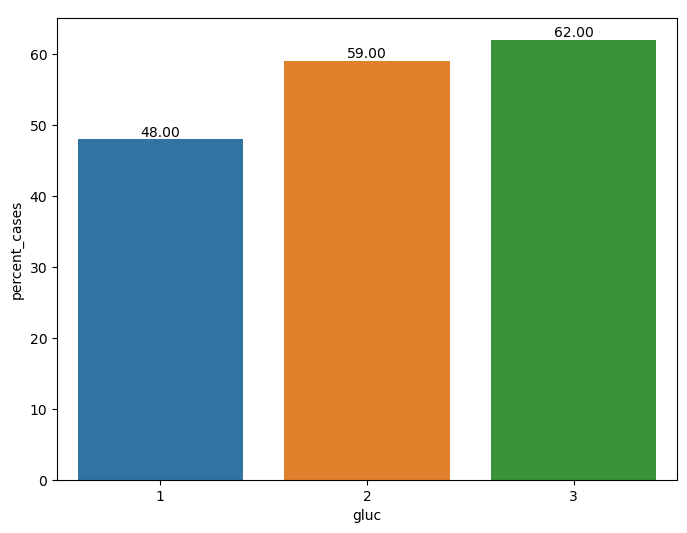

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(cardio_gluc, x = cardio_gluc.index, y = 'percent_cases')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='edge')

plt.show()

The higher the glucose indices, higher the percentual cases of cardio

In [57]:
cardio_gluc_age_imc = (df[df['cardio'] == 1].groupby([pd.qcut(df['imc'],5), pd.qcut(df['age'],5), 'gluc', 'gender'])
                   .agg({'cardio': 'count'}).reset_index())
cardio_gluc_age_imc['cardio_zero'] = (df[df['cardio'] == 0].groupby([pd.qcut(df['imc'],5), pd.qcut(df['age'],5), 'gluc',
                                          'gender']).agg({'cardio': 'count'})['cardio'].values)
cardio_gluc_age_imc['percent_cases'] = round((cardio_gluc_age_imc.cardio/
                                              (cardio_gluc_age_imc.cardio + cardio_gluc_age_imc.cardio_zero)),2)*100
cardio_gluc_age_imc.sort_values('percent_cases', ascending = False)

,imc,age,gluc,gender,cardio,cardio_zero,percent_cases
136,"(31.245, 298.667]","(18980.0, 20406.0]",3,1,178,47,79.0
147,"(31.245, 298.667]","(21850.0, 23713.0]",2,2,84,23,79.0
86,"(25.283, 27.682]","(21850.0, 23713.0]",2,1,81,22,79.0
118,"(27.682, 31.245]","(21850.0, 23713.0]",3,1,178,49,78.0
148,"(31.245, 298.667]","(21850.0, 23713.0]",3,1,297,85,78.0
...,...,...,...,...,...,...,...
30,"(23.437, 25.283]","(10797.999, 17216.0]",1,1,387,1113,26.0
2,"(3.471, 23.437]","(10797.999, 17216.0]",2,1,28,84,25.0
1,"(3.471, 23.437]","(10797.999, 17216.0]",1,2,285,999,22.0
0,"(3.471, 23.437]","(10797.999, 17216.0]",1,1,440,1825,19.0


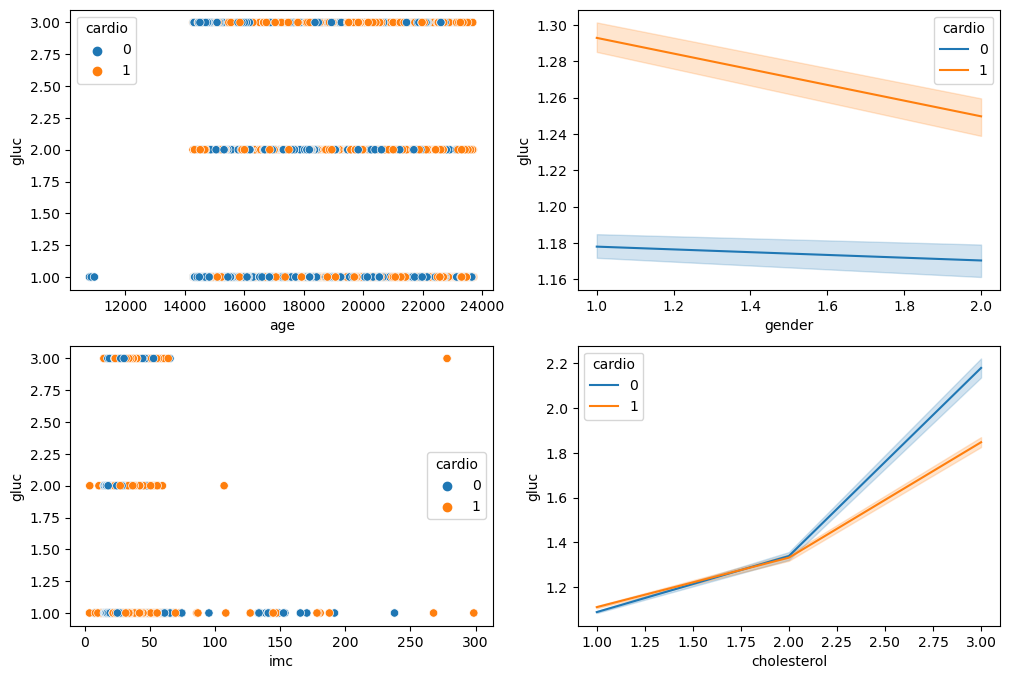

In [58]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))

sns.scatterplot(data=df, x="age", y="gluc", hue="cardio", ax = ax[0,0])
ax[0,0].tick_params(axis = 'x', rotation = 0)
sns.lineplot(data=df, x="gender", y="gluc", hue="cardio", ax = ax[0,1])
ax[0,1].tick_params(axis = 'x', rotation = 0)
sns.scatterplot(data=df, x="imc", y="gluc", hue="cardio", ax = ax[1,0])
ax[1,0].tick_params(axis = 'x', rotation = 0)
sns.lineplot(data=df, x="cholesterol", y="gluc", hue="cardio", ax = ax[1,1])
ax[1,1].tick_params(axis = 'x', rotation = 0)
plt.show()

Glucose affects more the highest IMC, the men, the older people and with high cholesteral

- What about if the people that smoke

In [59]:
cardio_smoke = df[df['cardio'] == 1].groupby('smoke').agg({'cardio': 'count'}).reset_index()
cardio_smoke['cardio_zero'] = (df[df['cardio'] == 0].groupby('smoke')
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_smoke['percent_cases'] = (round(cardio_smoke.cardio/
                                             (cardio_smoke.cardio + cardio_smoke.cardio_zero),2)*100)
cardio_smoke

,smoke,cardio,cardio_zero,percent_cases
0,0,32050,31781,50.0
1,1,2929,3240,47.0


In [60]:
cardio_smoke_gender = df[df['cardio'] == 1].groupby(['smoke', 'gender']).agg({'cardio': 'count'}).reset_index()
cardio_smoke_gender['cardio_zero'] = (df[df['cardio'] == 0].groupby(['smoke', 'gender'])
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_smoke_gender['percent_cases'] = (round(cardio_smoke_gender.cardio/
                                             (cardio_smoke_gender.cardio + cardio_smoke_gender.cardio_zero),2)*100)
cardio_smoke_gender

,smoke,gender,cardio,cardio_zero,percent_cases
0,0,1,22228,22489,50.0
1,0,2,9822,9292,51.0
2,1,1,388,425,48.0
3,1,2,2541,2815,47.0


In [61]:
cardio_smoke_imc = df[df['cardio'] == 1].groupby([pd.qcut(df['imc'],10), 'smoke']).agg({'cardio': 'count'}).reset_index()
cardio_smoke_imc['cardio_zero'] = (df[df['cardio'] == 0].groupby([pd.qcut(df['imc'],10), 'smoke'])
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_smoke_imc['percent_cases'] = (round(cardio_smoke_imc.cardio/
                                             (cardio_smoke_imc.cardio + cardio_smoke_imc.cardio_zero),2)*100)
cardio_smoke_imc

,imc,smoke,cardio,cardio_zero,percent_cases
0,"(3.471, 22.074]",0,2110,4129,34.0
1,"(3.471, 22.074]",1,225,551,29.0
2,"(22.074, 23.437]",0,2820,4141,41.0
3,"(22.074, 23.437]",1,207,391,35.0
4,"(23.437, 24.242]",0,2594,3463,43.0
5,"(23.437, 24.242]",1,198,310,39.0
6,"(24.242, 25.283]",0,2880,3455,45.0
7,"(24.242, 25.283]",1,284,378,43.0
8,"(25.283, 26.374]",0,2959,3263,48.0
9,"(25.283, 26.374]",1,293,349,46.0


In [62]:
cardio_smoke_ap_hi = df[df['cardio'] == 1].groupby([pd.cut(df['ap_hi'],[ 60,   110., 130., 150., 18000.]), 'smoke']).agg({'cardio': 'count'}).reset_index()
cardio_smoke_ap_hi['cardio_zero'] = (df[df['cardio'] == 0].groupby([pd.cut(df['ap_hi'],[ 60,   110., 130., 150., 18000.]), 'smoke'])
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_smoke_ap_hi['percent_cases'] = (round(cardio_smoke_ap_hi.cardio/
                                             (cardio_smoke_ap_hi.cardio + cardio_smoke_ap_hi.cardio_zero),2)*100)
cardio_smoke_ap_hi

,ap_hi,smoke,cardio,cardio_zero,percent_cases
0,"(60.0, 110.0]",0,2706,8796,24.0
1,"(60.0, 110.0]",1,212,800,21.0
2,"(110.0, 130.0]",0,14421,19956,42.0
3,"(110.0, 130.0]",1,1081,2126,34.0
4,"(130.0, 150.0]",0,10889,2296,83.0
5,"(130.0, 150.0]",1,1167,249,82.0
6,"(150.0, 18000.0]",0,3943,644,86.0
7,"(150.0, 18000.0]",1,466,59,89.0


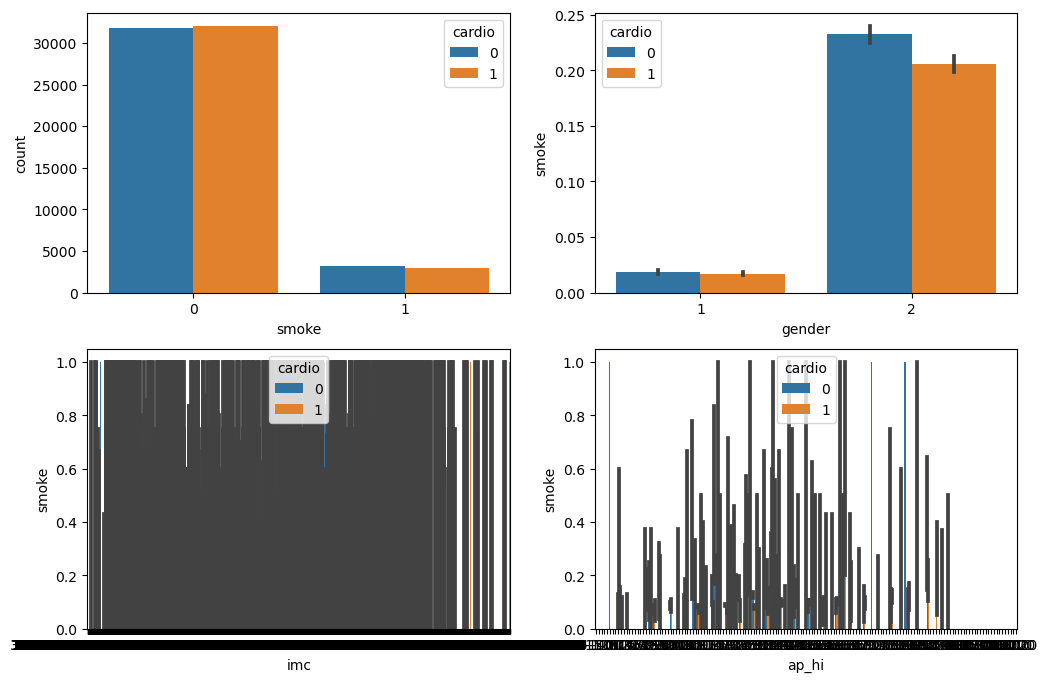

In [63]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))

sns.countplot(data=df, x="smoke", hue="cardio", ax = ax[0,0])
ax[0,0].tick_params(axis = 'x', rotation = 0)
sns.barplot(data=df, x="gender", y="smoke", hue="cardio", ax = ax[0,1])
ax[0,1].tick_params(axis = 'x', rotation = 0)
sns.barplot(data=df, x="imc", y="smoke", hue="cardio", ax = ax[1,0])
ax[1,0].tick_params(axis = 'x', rotation = 0)
sns.barplot(data=df, x="ap_hi", y="smoke", hue="cardio", ax = ax[1,1])
ax[1,1].tick_params(axis = 'x', rotation = 0)
plt.show()

Smokers of both genders have about 50% chances, however there are more men in te database. The higher the IMC and ap_hi, higher chances of cardio

- And the people who drinks alcoohol

In [64]:
cardio_alco = df[df['cardio'] == 1].groupby('alco').agg({'cardio': 'count'}).reset_index()
cardio_alco['cardio_zero'] = (df[df['cardio'] == 0].groupby('alco')
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_alco['percent_cases'] = (round(cardio_alco.cardio/
                                             (cardio_alco.cardio + cardio_alco.cardio_zero),2)*100)
cardio_alco

,alco,cardio,cardio_zero,percent_cases
0,0,33156,33080,50.0
1,1,1823,1941,48.0


In [65]:
cardio_alco_gender = df[df['cardio'] == 1].groupby(['alco', 'gender']).agg({'cardio': 'count'}).reset_index()
cardio_alco_gender['cardio_zero'] = (df[df['cardio'] == 0].groupby(['alco', 'gender'])
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_alco_gender['percent_cases'] = (round(cardio_alco_gender.cardio/
                                             (cardio_alco_gender.cardio + cardio_alco_gender.cardio_zero),2)*100)
cardio_alco_gender

,alco,gender,cardio,cardio_zero,percent_cases
0,0,1,22037,22332,50.0
1,0,2,11119,10748,51.0
2,1,1,579,582,50.0
3,1,2,1244,1359,48.0


In [66]:
cardio_alco_imc = df[df['cardio'] == 1].groupby([pd.qcut(df['imc'],10), 'alco']).agg({'cardio': 'count'}).reset_index()
cardio_alco_imc['cardio_zero'] = (df[df['cardio'] == 0].groupby([pd.qcut(df['imc'],10), 'alco'])
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_alco_imc['percent_cases'] = (round(cardio_alco_imc.cardio/
                                             (cardio_alco_imc.cardio + cardio_alco_imc.cardio_zero),2)*100)
cardio_alco_imc

,imc,alco,cardio,cardio_zero,percent_cases
0,"(3.471, 22.074]",0,2240,4413,34.0
1,"(3.471, 22.074]",1,95,267,26.0
2,"(22.074, 23.437]",0,2917,4311,40.0
3,"(22.074, 23.437]",1,110,221,33.0
4,"(23.437, 24.242]",0,2685,3606,43.0
5,"(23.437, 24.242]",1,107,167,39.0
6,"(24.242, 25.283]",0,3007,3638,45.0
7,"(24.242, 25.283]",1,157,195,45.0
8,"(25.283, 26.374]",0,3092,3419,47.0
9,"(25.283, 26.374]",1,160,193,45.0


In [67]:
cardio_alco_ap_hi = df[df['cardio'] == 1].groupby([pd.cut(df['ap_hi'],[ 60,   110., 130., 150., 18000.]), 'alco']).agg({'cardio': 'count'}).reset_index()
cardio_alco_ap_hi['cardio_zero'] = (df[df['cardio'] == 0].groupby([pd.cut(df['ap_hi'],[ 60,   110., 130., 150., 18000.]), 'alco'])
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_alco_ap_hi['percent_cases'] = (round(cardio_alco_ap_hi.cardio/
                                             (cardio_alco_ap_hi.cardio + cardio_alco_ap_hi.cardio_zero),2)*100)
cardio_alco_ap_hi

,ap_hi,alco,cardio,cardio_zero,percent_cases
0,"(60.0, 110.0]",0,2793,9123,23.0
1,"(60.0, 110.0]",1,125,473,21.0
2,"(110.0, 130.0]",0,14852,20828,42.0
3,"(110.0, 130.0]",1,650,1254,34.0
4,"(130.0, 150.0]",0,11324,2391,83.0
5,"(130.0, 150.0]",1,732,154,83.0
6,"(150.0, 18000.0]",0,4096,647,86.0
7,"(150.0, 18000.0]",1,313,56,85.0


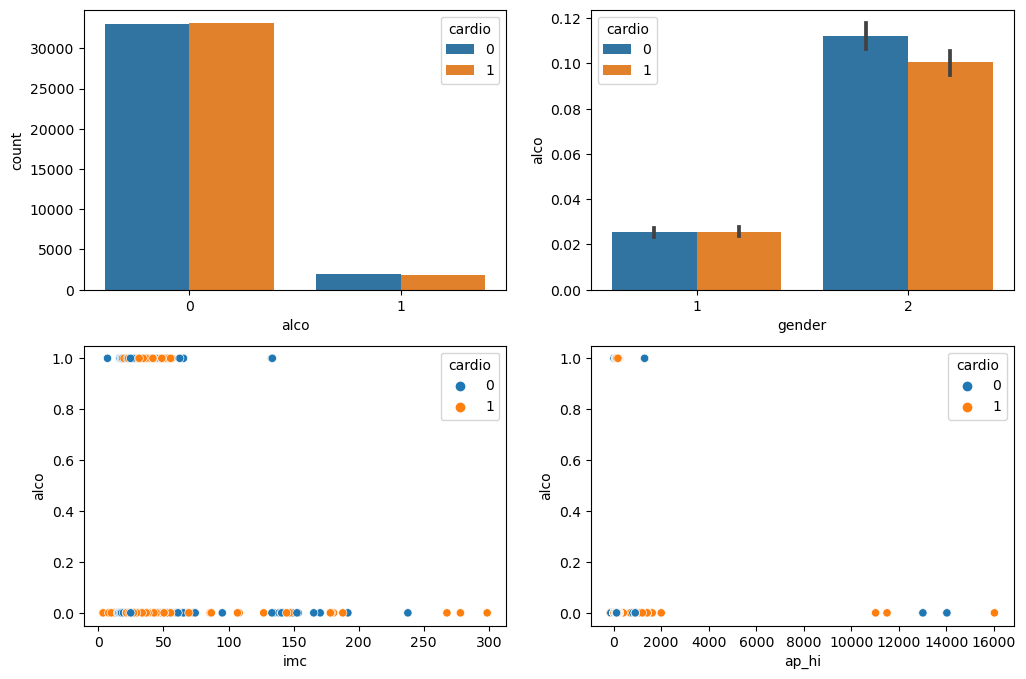

In [68]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))

sns.countplot(data=df, x="alco", hue="cardio", ax = ax[0,0])
ax[0,0].tick_params(axis = 'x', rotation = 0)
sns.barplot(data=df, x="gender", y="alco", hue="cardio", ax = ax[0,1])
ax[0,1].tick_params(axis = 'x', rotation = 0)
sns.scatterplot(data=df, x="imc", y="alco", hue="cardio", ax = ax[1,0])
ax[1,0].tick_params(axis = 'x', rotation = 0)
sns.scatterplot(data=df, x="ap_hi", y="alco", hue="cardio", ax = ax[1,1])
ax[1,1].tick_params(axis = 'x', rotation = 0)
plt.show()

Alcohol doesn't affect directly cardio, however with higher the IMC and ap_hi, higher chances of cardio

- The people who do exercise has less cardio?

In [69]:
cardio_active = df[df['cardio'] == 1].groupby('active').agg({'cardio': 'count'}).reset_index()
cardio_active['cardio_zero'] = (df[df['cardio'] == 0].groupby('active')
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_active['percent_cases'] = (round(cardio_active.cardio/
                                             (cardio_active.cardio + cardio_active.cardio_zero),2)*100)
cardio_active

,active,cardio,cardio_zero,percent_cases
0,0,7361,6378,54.0
1,1,27618,28643,49.0


In [70]:
cardio_active_gender = df[df['cardio'] == 1].groupby(['active', 'gender']).agg({'cardio': 'count'}).reset_index()
cardio_active_gender['cardio_zero'] = (df[df['cardio'] == 0].groupby(['active', 'gender'])
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_active_gender['percent_cases'] = (round(cardio_active_gender.cardio/
                                             (cardio_active_gender.cardio + cardio_active_gender.cardio_zero),2)*100)
cardio_active_gender

,active,gender,cardio,cardio_zero,percent_cases
0,0,1,4749,4265,53.0
1,0,2,2612,2113,55.0
2,1,1,17867,18649,49.0
3,1,2,9751,9994,49.0


In [71]:
cardio_active_imc = df[df['cardio'] == 1].groupby([pd.qcut(df['imc'],10), 'active']).agg({'cardio': 'count'}).reset_index()
cardio_active_imc['cardio_zero'] = (df[df['cardio'] == 0].groupby([pd.qcut(df['imc'],10), 'active'])
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_active_imc['percent_cases'] = (round(cardio_active_imc.cardio/
                                             (cardio_active_imc.cardio + cardio_active_imc.cardio_zero),2)*100)
cardio_active_imc

,imc,active,cardio,cardio_zero,percent_cases
0,"(3.471, 22.074]",0,484,834,37.0
1,"(3.471, 22.074]",1,1851,3846,32.0
2,"(22.074, 23.437]",0,648,842,43.0
3,"(22.074, 23.437]",1,2379,3690,39.0
4,"(23.437, 24.242]",0,643,715,47.0
5,"(23.437, 24.242]",1,2149,3058,41.0
6,"(24.242, 25.283]",0,629,666,49.0
7,"(24.242, 25.283]",1,2535,3167,44.0
8,"(25.283, 26.374]",0,666,658,50.0
9,"(25.283, 26.374]",1,2586,2954,47.0


In [72]:
cardio_active_ap_hi = df[df['cardio'] == 1].groupby([pd.cut(df['ap_hi'],[ 60,   110., 130., 150., 18000.]), 'active']).agg({'cardio': 'count'}).reset_index()
cardio_active_ap_hi['cardio_zero'] = (df[df['cardio'] == 0].groupby([pd.cut(df['ap_hi'],[ 60,   110., 130., 150., 18000.]), 'active'])
                                    .agg({'cardio': 'count'})['cardio'].values)
cardio_active_ap_hi['percent_cases'] = (round(cardio_active_ap_hi.cardio/
                                             (cardio_active_ap_hi.cardio + cardio_active_ap_hi.cardio_zero),2)*100)
cardio_active_ap_hi

,ap_hi,active,cardio,cardio_zero,percent_cases
0,"(60.0, 110.0]",0,623,1665,27.0
1,"(60.0, 110.0]",1,2295,7931,22.0
2,"(110.0, 130.0]",0,3553,4067,47.0
3,"(110.0, 130.0]",1,11949,18015,40.0
4,"(130.0, 150.0]",0,2322,490,83.0
5,"(130.0, 150.0]",1,9734,2055,83.0
6,"(150.0, 18000.0]",0,838,135,86.0
7,"(150.0, 18000.0]",1,3571,568,86.0


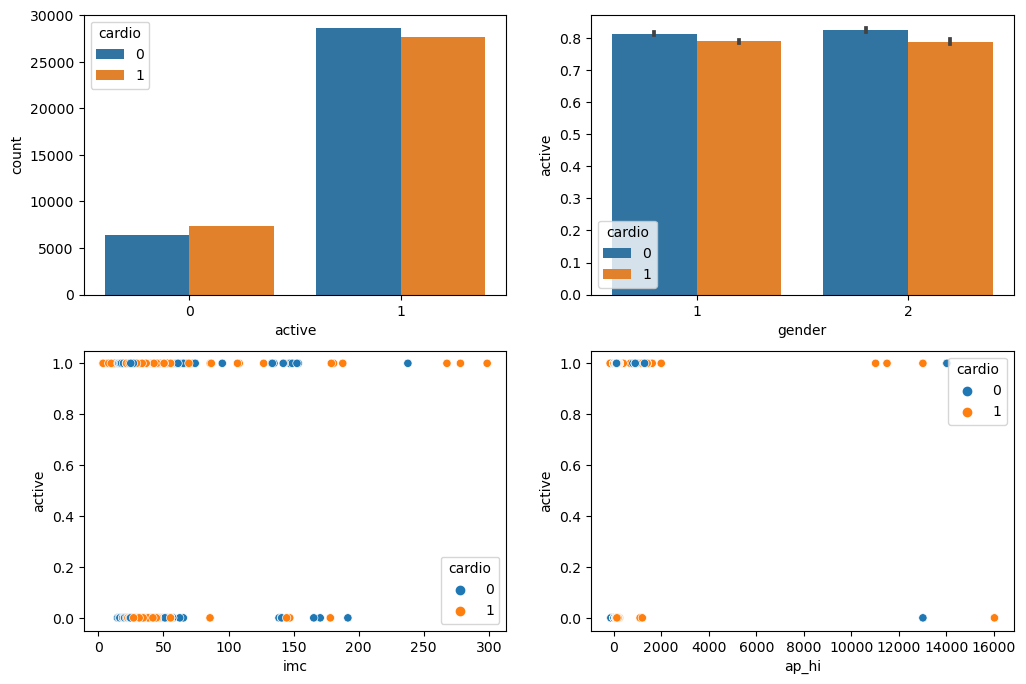

In [73]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))

sns.countplot(data=df, x="active", hue="cardio", ax = ax[0,0])
ax[0,0].tick_params(axis = 'x', rotation = 0)
sns.barplot(data=df, x="gender", y="active", hue="cardio", ax = ax[0,1])
ax[0,1].tick_params(axis = 'x', rotation = 0)
sns.scatterplot(data=df, x="imc", y="active", hue="cardio", ax = ax[1,0])
ax[1,0].tick_params(axis = 'x', rotation = 0)
sns.scatterplot(data=df, x="ap_hi", y="active", hue="cardio", ax = ax[1,1])
ax[1,1].tick_params(axis = 'x', rotation = 0)
plt.show()

In any cenario, do exercises is better to prevent cardios

## Initial conclusion

We may say when looking at the data:

    - Ap_hi, age cholesterol and smoke are the most important variables regarding cardio   
    - The data set has nao equal distribution abou gender
    - There are unreal numbers and outliers in age and blood pressure data
    - Ap_mean and imc are featured enginneering and helps to understand the data
    
Now, we can clean the database and prepare the models to predict cardio

## Cleaning the database

In [74]:
df.query('ap_hi < 80')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc
567,815,21281,1,168,78.0,14,90,2,1,0,0,1,1,52.0,27.636054
636,913,20457,2,169,68.0,70,110,1,1,0,0,1,0,90.0,23.808690
927,1294,21867,2,175,70.0,14,90,3,1,0,0,1,1,52.0,22.857143
979,1360,18225,1,172,65.0,11,80,1,3,0,0,1,0,45.5,21.971336
1600,2260,19201,1,165,66.0,12,80,1,1,0,0,1,0,46.0,24.242424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68630,98039,21217,1,160,59.0,12,80,1,1,0,0,1,0,46.0,23.046875
68742,98213,18755,1,158,74.0,14,90,1,1,0,0,1,1,52.0,29.642685
68998,98568,19107,1,154,77.0,14,90,1,1,0,0,1,0,52.0,32.467532
69137,98743,15442,2,176,65.0,12,80,1,1,0,0,1,0,46.0,20.983988


In [75]:
df.query('ap_hi < 80').ap_hi.value_counts()

 12     76
 14     29
 11     28
 70     18
 13     15
 15     12
 10      7
 20      4
 17      3
 16      3
 1       2
-100     2
-120     2
 7       1
 60      1
-115     1
-140     1
-150     1
 24      1
Name: ap_hi, dtype: int64

We have these wrong numbers os Systolic blood pressure, we should eliminate these lines

In [76]:
df.drop(df.query('ap_hi < 80').index, inplace = True)
df.query('ap_hi < 80')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc


In [77]:
df.query('ap_hi > 200')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc
1328,1863,21063,2,174,106.0,220,120,3,3,0,0,1,0,170.0,35.011230
1876,2654,15116,1,160,60.0,902,60,1,1,0,0,1,0,481.0,23.437500
2014,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0,453.0,21.155294
2142,3026,15384,2,174,113.0,210,1100,1,1,0,0,1,1,655.0,37.323292
2278,3208,22636,1,156,101.0,220,110,1,2,0,0,0,1,165.0,41.502301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67710,96686,19687,2,168,75.0,240,140,3,1,0,0,1,1,190.0,26.573129
68579,97963,19769,2,171,71.0,220,110,2,1,0,0,1,1,165.0,24.280975
68663,98095,18190,1,156,41.0,906,0,1,1,0,0,1,0,453.0,16.847469
69329,99019,19818,1,145,62.0,240,130,1,1,0,0,0,1,185.0,29.488704


In [78]:
df.query('ap_hi > 200').ap_hi.value_counts()

220      24
210      24
240       7
906       6
14020     4
907       3
1400      3
215       2
1300      2
13010     2
1420      2
806       1
960       1
1110      1
1409      1
1205      1
207       1
230       1
11020     1
309       1
1202      1
16020     1
401       1
902       1
1130      1
1620      1
202       1
1500      1
701       1
11500     1
909       1
2000      1
Name: ap_hi, dtype: int64

Also We have these wrong numbers os Systolic blood pressure, we should eliminate these lines

In [79]:
df.drop(df.query('ap_hi > 200').index, inplace = True)
df.query('ap_hi > 200')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc


In [80]:
df.query('ap_lo > 130')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1,630.0,29.263340
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1,580.0,24.341758
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1,470.0,36.888889
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1,580.0,20.338326
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1,570.0,34.154158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1,580.0,29.043709
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1,580.0,24.238227
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1,580.0,33.659297
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0,585.0,28.305995


In [81]:
df.query('ap_lo > 130').ap_lo.value_counts()

1000    666
1100    152
140      26
1200     21
1110     10
       ... 
8079      1
1111      1
1002      1
182       1
602       1
Name: ap_lo, Length: 66, dtype: int64

Here we have wrong numbers. Also we may have data multiplied by 10

In [82]:
df['ap_lo'] = np.where(df['ap_lo'] >= 600, df['ap_lo']/10, df['ap_lo'])
df.drop(df.query('ap_lo > 130').index, inplace = True)
df.query('ap_lo > 130').ap_lo.value_counts()

Series([], Name: ap_lo, dtype: int64)

In [83]:
df.query('ap_lo < 50')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc
418,594,16658,1,157,72.0,150,30.0,1,1,0,0,1,1,90.0,29.210110
507,728,16822,1,165,64.0,140,40.0,1,1,0,0,1,1,90.0,23.507805
5333,7590,20984,1,164,102.0,120,30.0,2,1,0,0,1,0,75.0,37.923855
6737,9610,16705,1,156,61.0,150,10.0,1,1,0,0,0,1,80.0,25.065746
7598,10843,14661,2,70,72.0,120,8.0,1,1,0,0,1,0,64.0,146.938776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65010,92788,15611,1,155,60.0,95,49.0,1,1,0,0,1,0,72.0,24.973985
65303,93224,23612,2,176,99.0,120,0.0,1,3,0,0,1,1,60.0,31.960227
67600,96520,21993,1,153,77.0,115,49.0,1,1,0,0,1,1,82.0,32.893332
68223,97439,18809,2,173,100.0,130,20.0,1,1,0,0,1,1,75.0,33.412409


In [84]:
df.query('ap_lo < 50').ap_lo.value_counts()

20.0    14
40.0    13
0.0     12
30.0     6
10.0     6
8.0      2
45.0     2
7.0      2
6.0      2
49.0     2
1.0      1
9.0      1
Name: ap_lo, dtype: int64

We have these wrong numbers os dyastolic blood pressure, we should eliminate these lines

In [85]:
df.drop(df.query('ap_lo < 40').index, inplace = True)
df.query('ap_lo < 40')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc


In [86]:
# age in years
df['age'] = (df['age'] / 365).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc
0,0,50,2,168,62.0,110,80.0,1,1,0,0,1,0,95.0,21.967120
1,1,55,1,156,85.0,140,90.0,3,1,0,0,1,1,115.0,34.927679
2,2,51,1,165,64.0,130,70.0,3,1,0,0,0,1,100.0,23.507805
3,3,48,2,169,82.0,150,100.0,1,1,0,0,1,1,125.0,28.710479
4,4,47,1,156,56.0,100,60.0,1,1,0,0,0,0,80.0,23.011177


In [87]:
df.drop(df.query('height > 200').index, inplace = True)
df.query('height > 200')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc


In [88]:
df.query('height < 100')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc
224,309,59,2,76,55.0,120,80.0,1,1,0,0,1,0,100.0,95.221607
8171,11662,48,2,97,170.0,160,100.0,1,1,1,0,1,1,130.0,180.678074
12770,18218,53,1,75,168.0,120,80.0,1,1,1,0,1,1,100.0,298.666667
13265,18928,61,2,71,68.0,120,80.0,3,1,0,0,1,0,100.0,134.893870
14323,20459,60,1,67,57.0,120,90.0,1,1,0,0,1,1,105.0,126.977055
15167,21686,43,1,70,68.0,120,80.0,1,1,0,0,0,0,100.0,138.775510
16699,23859,53,2,74,98.0,140,90.0,1,1,0,0,1,1,115.0,178.962747
22542,32207,39,1,68,65.0,100,60.0,1,1,0,0,0,0,80.0,140.570934
22723,32456,64,1,55,81.0,130,90.0,1,1,0,0,1,1,110.0,267.768595
23913,34186,52,1,81,156.0,140,90.0,1,1,0,0,1,0,115.0,237.768633


In [89]:
df.query('weight > 180')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc
435,618,45,1,186,200.0,130,70.0,1,1,0,0,0,0,100.0,57.810151
36780,52564,53,1,161,181.0,180,110.0,2,1,0,0,1,1,640.0,69.827553
50413,71945,41,2,180,200.0,150,90.0,1,1,0,0,1,1,120.0,61.728395
61285,87498,57,2,180,183.0,110,80.0,3,3,0,1,1,1,95.0,56.481481


In [90]:
df.drop(df.query('weight < 40').index, inplace = True)
df.query('weight < 40')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_mean,imc


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69513.0,49975.548459,28855.952997,0.000000,25002.000000,49993.000000,74900.000000,99999.000000
age,69513.0,52.840404,6.766904,29.000000,48.000000,53.000000,58.000000,64.000000
gender,69513.0,1.349503,0.476816,1.000000,1.000000,1.000000,2.000000,2.000000
height,69513.0,164.365701,8.173157,55.000000,159.000000,165.000000,170.000000,200.000000
weight,69513.0,74.228977,14.350910,40.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,69513.0,126.944255,16.814529,80.000000,120.000000,120.000000,140.000000,200.000000
ap_lo,69513.0,81.570567,9.647638,40.000000,80.000000,80.000000,90.000000,130.000000
cholesterol,69513.0,1.366939,0.680435,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,69513.0,1.226217,0.572032,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,69513.0,0.088286,0.283712,0.000000,0.000000,0.000000,0.000000,1.000000


## Modelling to predict cardio

<Axes: xlabel='cardio', ylabel='count'>

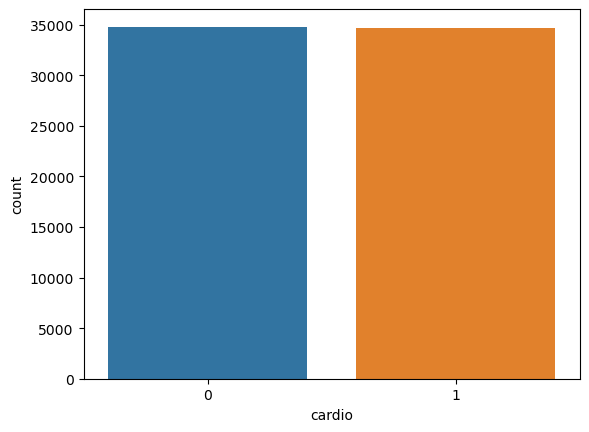

In [92]:
sns.countplot(x = df.cardio)

The target is balanced

In [93]:
SEED = 101

X = df.drop('cardio', axis = 1)
y = df.cardio

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=SEED)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=SEED)

### Logistic Regression

In [94]:
reg_log = LogisticRegression(random_state=SEED).fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
y_pred_valid = reg_log.predict(X_valid)

C:\Users\arsnf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


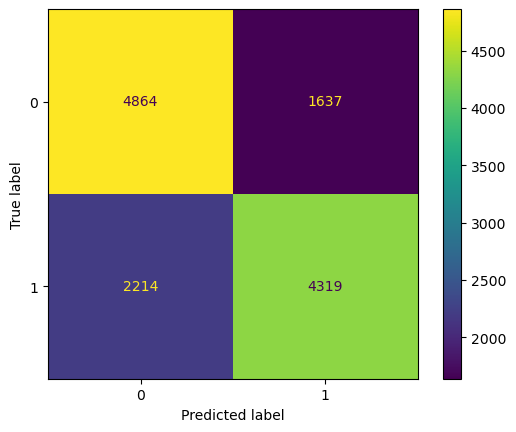

In [95]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [96]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print( f''' Para y_test
        recall: {round(recall,2)*100}
        precision: {round(precision,2)*100}
        f1 score: {round(f1,2)*100}    
        ''')

 Para y_test
        recall: 66.0
        precision: 73.0
        f1 score: 69.0    
        


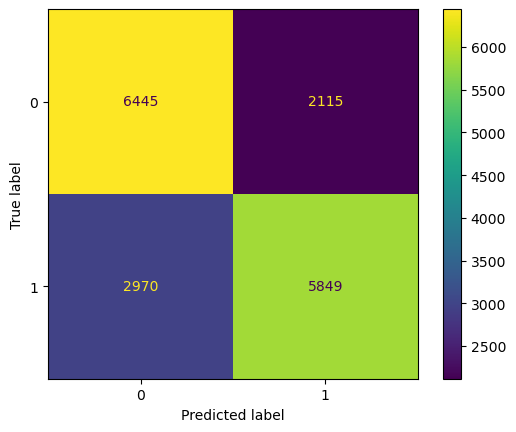

In [97]:
cm = confusion_matrix(y_valid, y_pred_valid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [98]:
recall_valid = recall_score(y_valid, y_pred_valid)
precision_valid = precision_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
print( f''' Para y_test
        recall: {round(recall_valid,2)*100}
        precision: {round(precision_valid,2)*100}
        f1 score: {round(f1_valid,2)*100}    
        ''')

 Para y_test
        recall: 66.0
        precision: 73.0
        f1 score: 70.0    
        


### Decision trees

In [99]:
caminho = DecisionTreeClassifier(random_state=SEED).cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=SEED, ccp_alpha=ccp_alpha).fit(X_train,y_train)
    clfs.append(clf)
    
train_scores = [clf.score(X_train,y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 73.05


DecisionTreeClassifier(ccp_alpha=0.00015223967234335133, random_state=101)

In [100]:
importance = ({"feature": list(X_train.columns),
               "importance": melhor_arvore.feature_importances_})

importance_clf = pd.DataFrame(importance).sort_values("importance", ascending=False)
importance_clf.head()

,feature,importance
5,ap_hi,0.762553
1,age,0.115100
7,cholesterol,0.075881
13,imc,0.010972
12,ap_mean,0.009652


In [101]:
#clf = DecisionTreeClassifier(random_state=SEED)
grid_param = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth' : [4,6,8],
    'min_samples_leaf': [10,15,20],
    'min_samples_split' : [4,6,8]}

grid = GridSearchCV(estimator = melhor_arvore, param_grid=grid_param, 
                    cv = 2)
grid.fit(X_train,y_train)
print(grid.best_params_)
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 4}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.073988,0.005306,0.007294,0.001216,gini,4,10,4,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.729412,0.727059,0.728235,0.001176,61
1,0.069400,0.012285,0.007863,0.000125,gini,4,10,6,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.729412,0.727059,0.728235,0.001176,61
2,0.085701,0.001525,0.008650,0.000064,gini,4,10,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.729412,0.727059,0.728235,0.001176,61
3,0.076666,0.012388,0.008106,0.001007,gini,4,15,4,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.729412,0.727059,0.728235,0.001176,61
4,0.077037,0.005469,0.008986,0.000365,gini,4,15,6,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.729412,0.727059,0.728235,0.001176,61


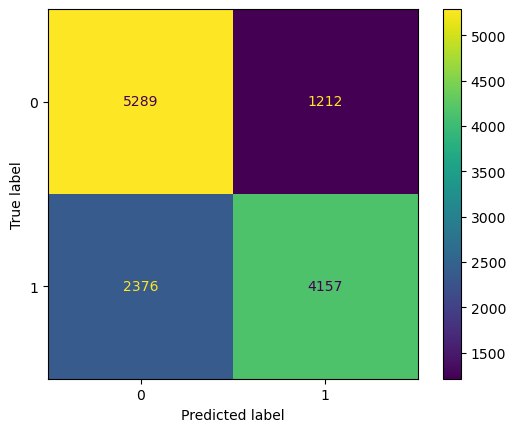

In [102]:
melhor_ccp = resultados.iloc[grid.best_index_,4]
clf_final = DecisionTreeClassifier(random_state=SEED,criterion = 'gini', 
                                   max_depth = 6, min_samples_leaf= 20, min_samples_split = 4, 
                                   ccp_alpha=0.0001522396).fit(X_train,y_train)
predictions = clf_final.predict(X_test)
pred_valid = clf_final.predict(X_valid)

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [103]:
recall_dt = recall_score(y_test, predictions)
precision_dt = precision_score(y_test, predictions)
f1_dt = f1_score(y_test, predictions)
print( f''' Para y_test
        recall: {round(recall_dt,2)*100}
        precision: {round(precision_dt,2)*100}
        f1 score: {round(f1_dt,2)*100}    
        ''')

 Para y_test
        recall: 64.0
        precision: 77.0
        f1 score: 70.0    
        


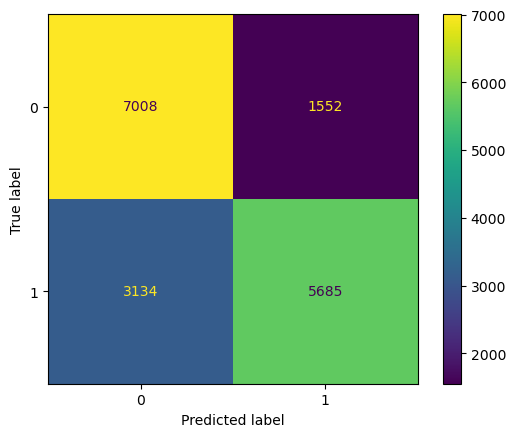

In [104]:
cm = confusion_matrix(y_valid, pred_valid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [105]:
recall_valid_dt = recall_score(y_valid, pred_valid)
precision_valid_dt = precision_score(y_valid, pred_valid)
f1_valid_dt = f1_score(y_valid, pred_valid)
print( f''' Para y_test
        recall: {round(recall_valid_dt,2)*100}
        precision: {round(precision_valid_dt,2)*100}
        f1 score: {round(f1_valid_dt,2)*100}    
        ''')

 Para y_test
        recall: 64.0
        precision: 79.0
        f1 score: 71.0    
        


We have generated a model with 71% of f1 score. That is pretty good option to start predicting

## Applying the model

In [106]:
df.iloc[59].cardio

1.0

In [107]:
clf_final.predict(pd.DataFrame(df[df.index == 59].drop('cardio', axis = 1)))

array([1], dtype=int64)

In [108]:
example = {
'id'       :       [74],
'age'      :       [34],
'gender'    :       [2],
'height'     :    [174],
'weight'     :     [84],
'ap_hi'      :    [110],
'ap_lo'       :    [70],
'cholesterol'  :    [1],
'gluc'         :    [1],
'smoke'       :     [0],
'alco'       :      [1],
'active'     :      [1],
'ap_mean'    :    [125],
'imc'        :     [28.79]}

clf_final.predict(pd.DataFrame(example))

array([0], dtype=int64)